# COMP 7570 Project -  Ripple Metrics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data_api.ripple_data_api import RippleDataAPIClient

In [2]:
api = RippleDataAPIClient('https://data.ripple.com')

## <font color=#41ACF0>Trade Volume</font><a class="anchor" id="supplemental"></a>

In [3]:
trade_volume = api.get_exchange_volume()

df_row_trade_volume = pd.DataFrame.from_dict(trade_volume['rows'][0]['components'], orient='columns')

In [4]:
df_trade_volume = pd.DataFrame('0',index=range(0,len(df_row_trade_volume)),columns=['base_currency','counter_currency',
                                                                                    'amount'])

In [5]:
for index,row in df_row_trade_volume.iterrows():    
    df_trade_volume.iloc[index]['base_currency'] = row['base']['currency']
    df_trade_volume.iloc[index]['counter_currency'] = row['counter']['currency']
    df_trade_volume.iloc[index]['amount'] = row['amount']

In [6]:
df_trade_volume

,base_currency,counter_currency,amount
0,USD,XRP,171482.20224266275
1,USD,XRP,47435.936353380865
2,CNY,XRP,128160.47390861406
3,EUR,XRP,14188.014007393407
4,BTC,XRP,2.086305282078485
5,USD,USD,11120.191596044526
6,CNY,XRP,61295.579763110894
7,CNY,ULT,35226.823656309796
8,ULT,XRP,153225.43569665772
9,XLM,XRP,52068.75331945433


In [7]:
df_trade_volume['amount'] = df_trade_volume['amount'].astype('float')

In [8]:
#grouping values by base currenvy and counter currency (we will show the total trade considering all exchanges)
df_trade_volume = df_trade_volume.groupby(['base_currency','counter_currency'])['amount'].agg('sum').to_frame('total_amount') \
                                                                                                    .reset_index()

In [9]:
df_trade_volume['trade_currencies'] = df_trade_volume["base_currency"] + "/" + df_trade_volume["counter_currency"]

In [10]:
df_trade_volume.drop(columns=["base_currency","counter_currency"], inplace=True)

In [11]:
df_trade_volume

,total_amount,trade_currencies
0,0.065156,BTC/USD
1,2.158628,BTC/XRP
2,17508.415172,CNY/CNY
3,35226.823656,CNY/ULT
4,15706.590638,CNY/USD
5,5630.740729,CNY/XLM
6,189456.053672,CNY/XRP
7,1.307255,ETH/XRP
8,0.855000,EUR/USD
9,14188.014007,EUR/XRP


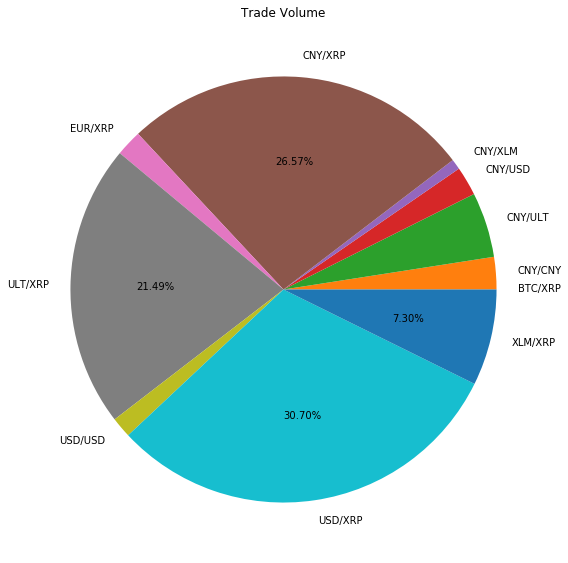

In [12]:
#function for disconsider to show % on the chart for low values
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 5 else ''

#excluding some law values from the dataframe (they are really hard to see)
df_trade_volume = df_trade_volume.drop(index = df_trade_volume[df_trade_volume.total_amount < 2].index)

series = pd.Series(df_trade_volume['total_amount'].values, index=df_trade_volume['trade_currencies'], 
                   name='')
series.plot.pie(autopct=my_autopct, figsize=(8,8))

plt.title('Trade Volume')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Trade Volume:</b> We can see by the graph and table above that 30.93% of all exchange are between USD and XRP,
    folowed by CNY (Chinese Yuan) and XRP. 
</div>

## <font color=#41ACF0>XRP Distribution</font><a class="anchor" id="supplemental"></a>

In [13]:
xrp_dist_row = api.get_xrp_distribution()
df_xrp_dist = pd.DataFrame.from_dict(xrp_dist_row['rows'], orient='columns')

In [14]:
df_xrp_dist['year'] = df_xrp_dist['date'].str.slice(0,4)
df_xrp_dist['month'] = df_xrp_dist['date'].str.slice(5,7)
df_xrp_dist['day'] = df_xrp_dist['date'].str.slice(8,10)

In [15]:
df_xrp_dist = df_xrp_dist.drop(columns=['date'])

In [16]:
df_xrp_dist

,total,distributed,undistributed,escrowed,year,month,day
0,99997364318,35108326973,64889037345,NaN,2016,06,05
1,99997344164,35108308819,64889035345,NaN,2016,06,12
2,99997334029,35345983560,64651350469,NaN,2016,06,19
3,99997322412,35345971933,64651350479,NaN,2016,06,26
4,99997309184,35438268570,64559040613,NaN,2016,07,03
...,...,...,...,...,...,...,...
172,99991321535,43242653330,6748668193,50000000013,2019,10,13
173,99991316762,43248091671,6743225077,50000000013,2019,10,20
174,99991308084,43268247816,6723060255,50000000013,2019,10,27
175,99991298961,43298481757,6792817191,49900000013,2019,11,03


In [17]:
group_day_max = df_xrp_dist.groupby(['year','month'])['day'].agg('max').to_frame('max_day').reset_index()
df_xrp_dist = df_xrp_dist.merge(group_day_max, left_on=['year','month','day'], right_on=['year','month','max_day'])

df_xrp_dist['date'] = df_xrp_dist['year'] + "-" + df_xrp_dist['month']

df_xrp_dist.drop(columns=['max_day','year','month','day'], inplace=True)

In [18]:
df_xrp_dist.head()

,total,distributed,undistributed,escrowed,date
0,99997322412,35345971933,64651350479,NaN,2016-06
1,99997268571,35557883251,64439385320,NaN,2016-07
2,99997213110,35316813001,64680400109,NaN,2016-08
3,99997179232,35475196836,64521982395,NaN,2016-09
4,99997006553,35649569539,64347437014,NaN,2016-10


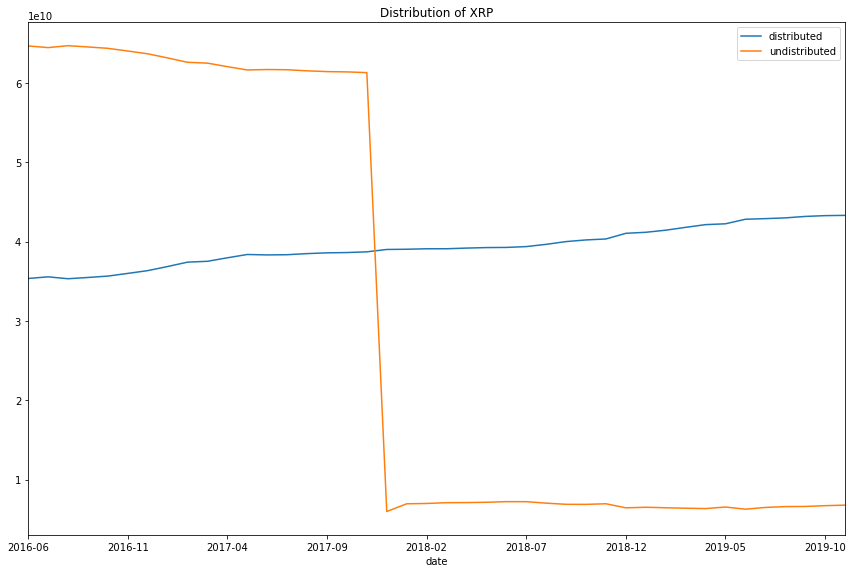

In [19]:
test = pd.DataFrame(df_xrp_dist[['distributed','undistributed']].values.astype('float'), index=df_xrp_dist['date'],
             columns=['distributed','undistributed'])


test.plot(figsize=(12,8))
plt.tight_layout()
plt.title('Distribution of XRP')
plt.show()

<div class="alert alert-block alert-info">
<b>XRP Distribution:</b> The big drop of undistributed XRP in 2017-12 is due to Ripple pacing 55 billion XRP in a escrow account. More information on this: 
    <a href="https://ripple.com/insights/ripple-escrows-55-billion-xrp-for-supply-predictability/">Ripple Escrows 55 Billion XRP for Supply Predictability</a>
</div>

## <font color=#41ACF0>Payment Volume by Currency</font><a class="anchor" id="supplemental"></a>

In [20]:
volume = api.get_payment_volume()

df_volume = pd.DataFrame.from_dict(volume['rows'][0]['components'], orient='columns')
df_volume

,currency,amount,count,rate,converted_amount,issuer
0,XRP,621950299.6600986,28653,1.0000000,621950299.6600986,NaN
1,USD,729889.1636460173,43,0.21168136,3448055.893559603,rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B
2,EUR,49748.11,35,0.20126318,247179.3899226021,rhub8VRN55s94qWKDv6jmDy1pUykJzF3wq
3,CNY,107792,6,1.5236855,70744.25572135519,razqQKzJRdB4UxFPWf5NEpEG3WMkmwgcXA
4,CNY,90036,5,1.5180648,59309.72231590136,rKiCet8SdvWxPXnAgYarFUXMh1zCPz432Y
5,BTC,1.5746977191543068,13,0.000030864543,51019.635012151426,rchGBxcD1A1C2tdxF6papQYZ8kjRKMYcL
6,USD,115,1,0.21948140,523.9623849708089,rhub8VRN55s94qWKDv6jmDy1pUykJzF3wq
7,ETH,0.4985898,1,0.0015440323,322.9140918928287,rcA8X3TVMST1n3CJeAdGk1RdRCHii7N2h


In [21]:
df_volume['amount'] = df_volume['amount'].astype('float')

In [22]:
#grouping values by currency (we will show the total volume considering all issuers)
df_volume = df_volume.groupby(['currency'])['amount'].agg('sum').to_frame('total_amount').reset_index()

In [23]:
df_volume

,currency,total_amount
0,BTC,1.574698e+00
1,CNY,1.978280e+05
2,ETH,4.985898e-01
3,EUR,4.974811e+04
4,USD,7.300042e+05
5,XRP,6.219503e+08


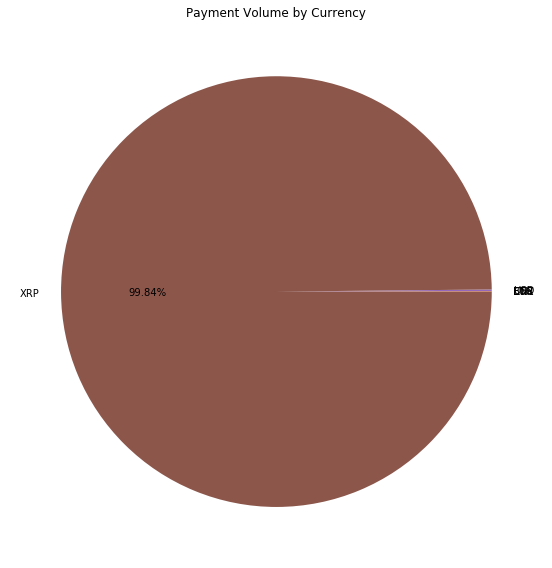

In [24]:
#function for disconsider to show % on the chart for low values
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 5 else ''

series = pd.Series(df_volume['total_amount'].values, index=df_volume['currency'], name='')
series.plot.pie(labels=df_volume['currency'], autopct=my_autopct, figsize=(8,8))

plt.title('Payment Volume by Currency')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Payment Volume:</b> We can see by the graph and table above that 99.83% of all payments are made in XRP. 
</div>